In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
labels=["age", "workclass","fnlwgt", "education", "education-num", "marital-status", "occupation","relationship", "race", "sex", "capital-gain", "capital-loss", 
        "hours-per-week", "native-country", "salary"]

In [39]:
df=pd.read_csv("adult.data" , names=labels)


In [40]:
df.shape

(32561, 15)

In [41]:
df.isnull().sum()    # NO null Values 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [43]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [44]:
# Counting no. of entries with salary less than 50K and greater than 50 K
df.groupby(['salary']).size()


salary
 <=50K    24720
 >50K      7841
dtype: int64

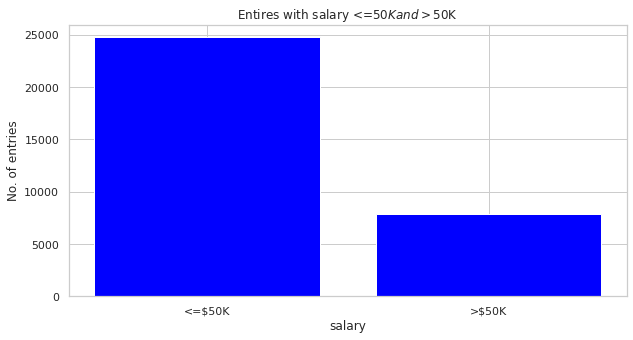

In [45]:
## visualizing it 
  
# creating the dataset
data = {'<=$50K':24720, '>$50K':7841}
keys = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys, values, color ='blue')
 
plt.xlabel("salary")
plt.ylabel("No. of entries")
plt.title("Entires with salary <=$50K and >$50K")
plt.show()

In [47]:
df.isnull().sum(axis = 0)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [49]:
# Replacing special character to nan  
df['native-country'] = df['native-country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)
#

In [51]:
Y=df["salary"]

In [52]:
YY=pd.get_dummies(Y, drop_first=True)

In [53]:
YY


,>50K
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [56]:
X=df.drop(['salary'], axis=1)

In [57]:
X['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [58]:
edu=X['education'].unique()
print(edu)

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


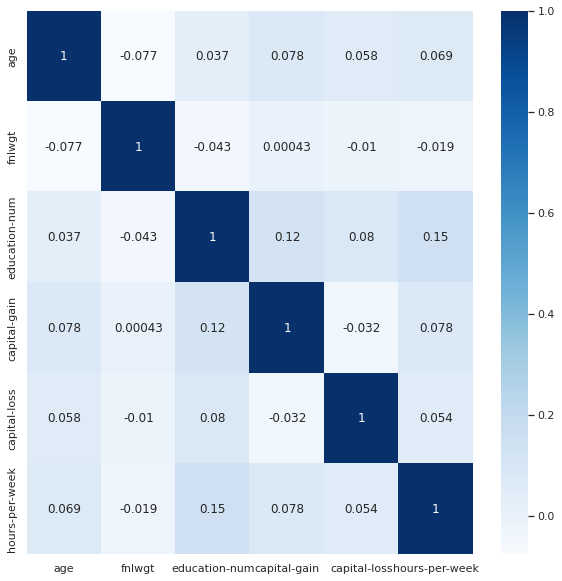

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), annot=True, cmap='Blues')   # fnlwgt feature useless
plt.show()

In [60]:
X.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

In [64]:
new_df = X.select_dtypes(include=['int64', 'float64'])

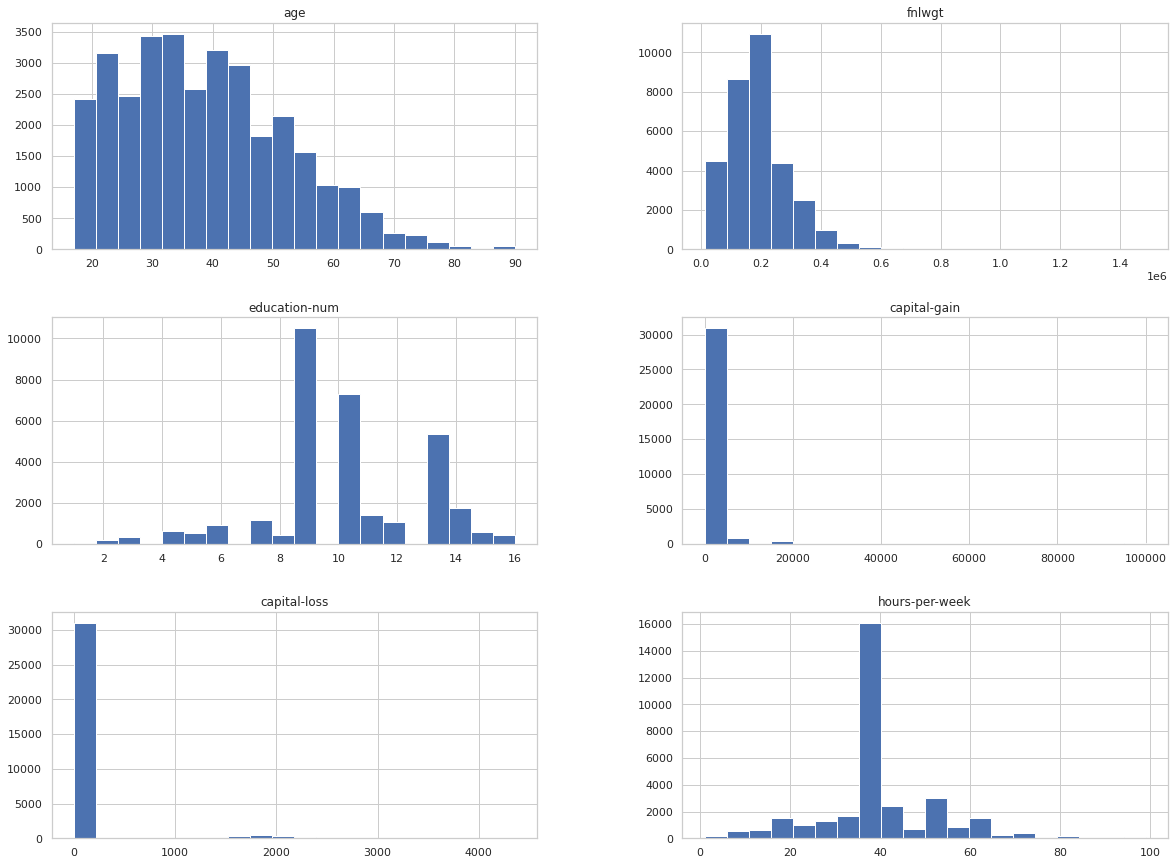

In [65]:
new_df.hist(bins=20, figsize=(20, 15))
plt.show()    ## ANALYSIS Age 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


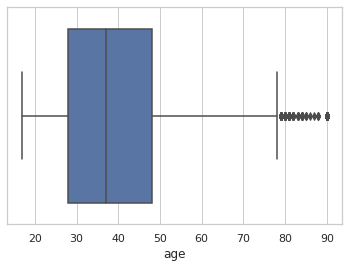

In [66]:
sns.set(style="whitegrid")
sns.boxplot(X['age'] )

In [68]:
print(X['age'].quantile(0.10))
print(X['age'].quantile(0.90))

22.0
58.0


In [69]:
X['age'] = np.where(X['age']<22, 22,X['age'])
X['age']= np.where(X['age'] >58, 58,X['age'])
print(X['age'].skew())

0.24328279571166717


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


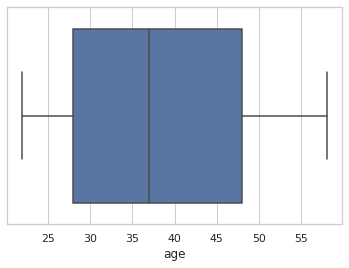

In [70]:
sns.set(style="whitegrid")
sns.boxplot(X['age'] )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


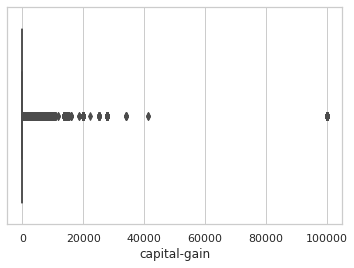

In [71]:
sns.set(style="whitegrid")
sns.boxplot(X['capital-gain'] )

In [116]:
X

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,6,77516,9,4,0,1,4,1,40,38
1,50,5,83311,9,2,3,0,4,1,24,38
2,38,3,215646,11,0,5,1,4,1,40,38
3,53,3,234721,1,2,5,0,2,1,40,38
4,28,3,338409,9,2,9,5,2,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,2,12,5,4,0,38,38
32557,40,3,154374,11,2,6,0,4,1,40,38
32558,58,3,151910,11,6,0,4,4,0,40,38
32559,22,3,201490,11,4,0,3,4,1,24,38


In [182]:
X

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,6,77516,9,4,0,1,4,1,40,38
1,50,5,83311,9,2,3,0,4,1,24,38
2,38,3,215646,11,0,5,1,4,1,40,38
3,53,3,234721,1,2,5,0,2,1,40,38
4,28,3,338409,9,2,9,5,2,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,2,12,5,4,0,38,38
32557,40,3,154374,11,2,6,0,4,1,40,38
32558,58,3,151910,11,6,0,4,4,0,40,38
32559,22,3,201490,11,4,0,3,4,1,24,38


In [84]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [85]:
X.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,24,United-States
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba


In [86]:
X['native-country'] =le.fit_transform(X['native-country'])
X['workclass'] =le.fit_transform(X['workclass'])
X['education'] =le.fit_transform(X['education'])
X['marital-status'] =le.fit_transform(X['marital-status'])
X['occupation'] =le.fit_transform(X['occupation'])
X['relationship'] =le.fit_transform(X['relationship'])
X['race'] =le.fit_transform(X['race'])
X['sex'] =le.fit_transform(X['sex'])
X['native-country'] =le.fit_transform(X['native-country'])


#

In [87]:
X.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,6,77516,9,4,0,1,4,1,40,38
1,50,5,83311,9,2,3,0,4,1,24,38
2,38,3,215646,11,0,5,1,4,1,40,38
3,53,3,234721,1,2,5,0,2,1,40,38
4,28,3,338409,9,2,9,5,2,0,40,4


In [88]:
plt.figure(figsize = (20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

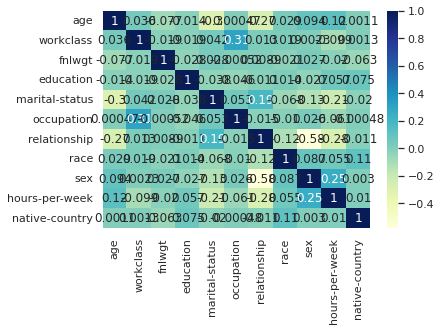

In [89]:
sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_data=scaler.fit_transform(X)

In [148]:
x_train=X_data
y_train=YY

In [91]:
# from sklearn.model_selection import train_test_split

In [92]:
# x_train, x_test, y_train, y_test=train_test_split(X_data, YY, test_size=0.3,random_state=20, stratify =YY)



In [129]:
test_df=pd.read_csv("adult.test", names=labels)

In [130]:
test_df=test_df[1:]

In [140]:
test_df=test_df.drop(['salary'],axis=1)

In [141]:
test_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
1,25,3,226802.0,1,7.0,4,6,3,2,1,0.0,0.0,40.0,37
2,38,3,89814.0,11,9.0,2,4,0,4,1,0.0,0.0,50.0,37
3,28,1,336951.0,7,12.0,2,10,0,4,1,0.0,0.0,40.0,37
4,44,3,160323.0,15,10.0,2,6,0,2,1,7688.0,0.0,40.0,37
5,18,8,103497.0,15,10.0,4,14,3,4,0,0.0,0.0,30.0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,3,215419.0,9,13.0,0,9,1,4,0,0.0,0.0,36.0,37
16278,64,8,321403.0,11,9.0,6,14,2,2,1,0.0,0.0,40.0,37
16279,38,3,374983.0,9,13.0,2,9,0,4,1,0.0,0.0,50.0,37
16280,44,3,83891.0,9,13.0,0,0,3,1,1,5455.0,0.0,40.0,37


In [133]:
test_df.isnull().sum()  

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [134]:
# Replacing special character to nan  
test_df['native-country'] =test_df['native-country'].replace(' ?',np.nan)
test_df['workclass'] =test_df['workclass'].replace(' ?',np.nan)
test_df['occupation'] = test_df['occupation'].replace(' ?',np.nan)
#

In [ ]:
test_df=test_df.drop([])

In [135]:
test_Y=test_df["salary"]

In [136]:
test_Y=pd.get_dummies(test_Y, drop_first=True)

In [138]:
test_df['native-country'] =le.fit_transform(test_df['native-country'])
test_df['workclass'] =le.fit_transform(test_df['workclass'])
test_df['education'] =le.fit_transform(test_df['education'])
test_df['marital-status'] =le.fit_transform(test_df['marital-status'])
test_df['occupation'] =le.fit_transform(test_df['occupation'])
test_df['relationship'] =le.fit_transform(test_df['relationship'])
test_df['race'] =le.fit_transform(test_df['race'])
test_df['sex'] =le.fit_transform(test_df['sex'])
test_df['native-country'] =le.fit_transform(test_df['native-country'])


In [158]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
1,25,3,226802.0,1,7.0,4,6,3,2,1,0.0,0.0,40.0,37
2,38,3,89814.0,11,9.0,2,4,0,4,1,0.0,0.0,50.0,37
3,28,1,336951.0,7,12.0,2,10,0,4,1,0.0,0.0,40.0,37
4,44,3,160323.0,15,10.0,2,6,0,2,1,7688.0,0.0,40.0,37
5,18,8,103497.0,15,10.0,4,14,3,4,0,0.0,0.0,30.0,37


In [159]:
test_df=test_df.drop(['education-num','capital-gain','capital-loss'], axis=1)

In [160]:
test_X=scaler.fit_transform(test_df)


In [161]:
x_test=test_X
y_test=test_Y

In [162]:
### TESTING DATA 

In [163]:
from sklearn import svm
clf=svm.SVC(kernel='poly')


In [164]:
# y_train.shape

In [165]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [166]:
y_pred=clf.predict(x_test)

In [167]:
train_pred=clf.predict(x_train)

In [168]:
from sklearn import metrics

In [169]:
print(metrics.accuracy_score(y_test,y_pred))

0.7732326024199988


In [170]:
print(metrics.accuracy_score(y_train,train_pred))

0.8053499585393569


In [171]:
print(metrics.f1_score(y_test, y_pred,average='weighted'))

0.7049092899126922


In [172]:
print(metrics.f1_score(y_train, train_pred,average='weighted'))

0.7996241291760783


In [173]:
import xgboost as xgb

In [174]:
boost=xgb.XGBClassifier(n_estimators=200,max_depth=30,learning_rate=0.1)

In [175]:
boost.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(max_depth=30, n_estimators=200)

In [176]:
pred=boost.predict(x_test)

In [177]:
train_pred=boost.predict(x_train)

In [178]:
print(metrics.f1_score(y_train, train_pred,average='weighted'))

0.9998771643433414


In [179]:
print(metrics.f1_score(y_test, pred,average='weighted'))

0.806279898374149


In [180]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     12435
           1       0.69      0.44      0.54      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.69      0.71     16281
weighted avg       0.81      0.82      0.81     16281

